# YouTube Spam Collection v. 1

## Grupo 2
Alberto Atilio Sbrana Junior
<br>
Luiz Barreto Pedro de Alcântara
<br>
Priscila Portela Costa

# Problema

Trata-se de um problema de classificação binária sobre comentários de vídeos no Youtube.
<br>
Há no total 5 arquivos, separados por artista:
- Psy
- Katy Perry
- LMFAO
- Eminem
- Shakira

# Bibliotecas

In [46]:
import pandas as pd #manipulação de dataframes
import numpy as np #manipulacao matricial
import seaborn as sns #visualização
import matplotlib.pyplot as plt #visualização

import scipy.optimize  #otimizacao de parametros

from ML_library import * #biblioteca criada pelo grupo 2

# Modelo 2: Naive Bayes

## Carregando os _datasets_

In [47]:
#occurency
X_occur_train = pd.read_csv('X_occurrency_train.csv', header=None).values
X_occur_test = pd.read_csv('X_occurrency_test.csv', header=None).values
X_occur_val = pd.read_csv('X_occurrency_validation.csv', header=None).values

Y_occur_train = pd.read_csv('Y_occurrency_train.csv', header=None).values
Y_occur_test = pd.read_csv('Y_occurrency_test.csv', header=None).values
Y_occur_val = pd.read_csv('Y_occurrency_validation.csv', header=None).values

#frequency
X_frequ_train = pd.read_csv('X_frequency_train.csv', header=None).values
X_frequ_test = pd.read_csv('X_frequency_test.csv', header=None).values
X_frequ_val = pd.read_csv('X_frequency_validation.csv', header=None).values

Y_frequ_train = pd.read_csv('Y_frequency_train.csv', header=None).values
Y_frequ_test = pd.read_csv('Y_frequency_test.csv', header=None).values
Y_frequ_val = pd.read_csv('Y_frequency_validation.csv', header=None).values

#tf_idf
X_tfidf_train = pd.read_csv('X_tfidf_train.csv', header=None).values
X_tfidf_test = pd.read_csv('X_tfidf_test.csv', header=None).values
X_tfidf_val = pd.read_csv('X_tfidf_validation.csv', header=None).values

Y_tfidf_train = pd.read_csv('Y_tfidf_train.csv', header=None).values
Y_tfidf_test = pd.read_csv('Y_tfidf_test.csv', header=None).values
Y_tfidf_val = pd.read_csv('Y_tfidf_validation.csv', header=None).values

## Funções auxiliares

In [48]:
def calcularProbabilidades(X, Y):
   
    pAtrSPAM = np.zeros(X.shape[1])
    pAtrHAM = np.zeros(X.shape[1])
    
    SPAM_indice = np.where(Y == 1)
    HAM_indice = np.where(Y == 0)
    
    pAtrSPAM = X[SPAM_indice].sum(axis=0)/len(SPAM_indice[0])
    pAtrHAM = X[HAM_indice].sum(axis=0)/len(HAM_indice[0])

    return pAtrSPAM, pAtrHAM


def classificacao(x,pSPAM,pHAM,pAtrSPAM,pAtrHAM):
    classe = 0;
    probSPAM = 1;
    probHAM = 1;
    
    for idx, val in enumerate(x):
        if val == 1:
            probSPAM = probSPAM * pAtrSPAM[idx]
            probHAM = probHAM * pAtrHAM[idx]
        else:
            probSPAM = probSPAM * (1-pAtrSPAM[idx])
            probHAM = probHAM * (1-pAtrHAM[idx])    
            
    probSPAM = probSPAM*pSPAM
    probHAM = probHAM*pHAM
            
    if probSPAM > probHAM:
        classe = 1
    else:
        classe = 0
                
    return classe, probSPAM, probHAM 

## Occurrency

In [49]:
pAtrSPAM_occur, pAtrHAM_occur = calcularProbabilidades(X_occur_train,Y_occur_train.T[0])
pSPAM_occur = sum(Y_occur_train==1)/len(Y_occur_train) 
pHAM_occur = sum(Y_occur_train==0)/len(Y_occur_train)

res_val_occur = []
for i in X_occur_val:
    result, probSPAM_occur, probHAM_occur = classificacao(i,pSPAM_occur,pHAM_occur,pAtrSPAM_occur,pAtrHAM_occur)
    res_val_occur.append(result)
    
cm_occur = get_confusionMatrix(Y_occur_val, res_val_occur, [0,1])
print('Matriz de confusão:')
print(cm_occur)

Matriz de confusão:
[[ 93  56]
 [102  16]]


## Frequency

In [50]:
pAtrSPAM_frequ, pAtrHAM_frequ = calcularProbabilidades(X_frequ_train,Y_frequ_train.T[0])
pSPAM_frequ = sum(Y_frequ_train==1)/len(Y_frequ_train) 
pHAM_frequ = sum(Y_frequ_train==0)/len(Y_frequ_train)

res_val_frequ = []
for i in X_frequ_val:
    result, probSPAM_frequ, probHAM_frequ = classificacao(i,pSPAM_frequ,pHAM_frequ,pAtrSPAM_frequ,pAtrHAM_frequ)
    res_val_frequ.append(result)
    
cm_frequ = get_confusionMatrix(Y_frequ_val, res_val_frequ, [0,1])
print('Matriz de confusão:')
print(cm_frequ)

Matriz de confusão:
[[ 91  58]
 [102  16]]


## TF_IDF

In [51]:
pAtrSPAM_tfidf, pAtrHAM_tfidf = calcularProbabilidades(X_tfidf_train,Y_tfidf_train.T[0])
pSPAM_tfidf = sum(Y_tfidf_train==1)/len(Y_tfidf_train) 
pHAM_tfidf = sum(Y_tfidf_train==0)/len(Y_tfidf_train)

res_val_tfidf = []
for i in X_tfidf_val:
    result, probSPAM_tfidf, probHAM_tfidf = classificacao(i,pSPAM_tfidf,pHAM_tfidf,pAtrSPAM_tfidf,pAtrHAM_tfidf)
    res_val_tfidf.append(result)
    
cm_tfidf = get_confusionMatrix(Y_tfidf_val, res_val_tfidf, [0,1])
print('Matriz de confusão:')
print(cm_tfidf)

Matriz de confusão:
[[114  35]
 [111   7]]


## F1 Scores

In [52]:
cm_nb = {'Occurrency': cm_occur,
         'Frequency': cm_frequ,
         'TF-IDF': cm_tfidf}

for k, cm in cm_nb.items():
    vp=cm[0,0] # quantidade de verdadeiros positivos
    vn=cm[1,1] # quantidade de verdadeiros negativos
    fp=cm[1,0] # quantidade de falsos positivos
    fn=cm[0,1] # quantidade de falsos negativos
    
    recall = vp/(vp+fn)
    precision = vp/(vp+fp)
    
    f1 = 2 * (precision * recall) / (precision + recall)
    print('Tratamento {}: {}'.format(k, f1))

Tratamento Occurrency: 0.5406976744186047
Tratamento Frequency: 0.5321637426900585
Tratamento TF-IDF: 0.6096256684491979


Verificamos que o modelo que usa o modo de tratamento _TF-IDF_ é o que se sai melhor de acordo com a métrica escolhida.

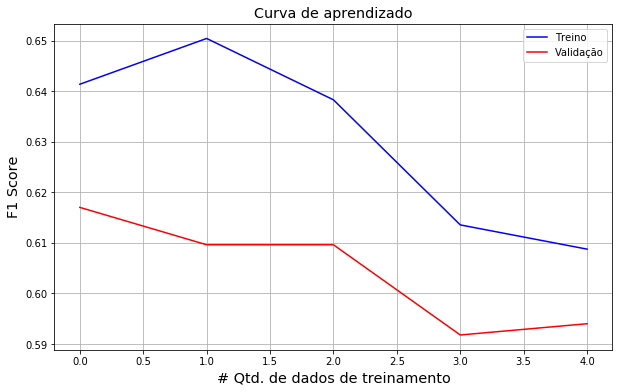

In [53]:
def curva_aprendizado_nb(X, Y, Xval, Yval):

    # inicializa as listas que guardarao a performance no treinamento e na validacao
    perf_train = []
    perf_val = []
    
    num_rows = len(X)
    
    for i in range(200,num_rows, 200):
        x_train = X[0:i,:]
        y_train = Y[0:i]
        
        pAtrSPAM_tfidf, pAtrHAM_tfidf = calcularProbabilidades(x_train,y_train.T[0])
        pSPAM_tfidf = sum(Y==1)/len(Y) 
        pHAM_tfidf = sum(Y==0)/len(Y)
        
        #train
        pred_train = []
        for i in x_train:
            result, probSPAM_tfidf, probHAM_tfidf = classificacao(i,pSPAM_tfidf,pHAM_tfidf,pAtrSPAM_tfidf,pAtrHAM_tfidf)
            pred_train.append(result)            
        
        #validation
        pred_val = []
        for i in Xval:
            result, probSPAM_tfidf, probHAM_tfidf = classificacao(i,pSPAM_tfidf,pHAM_tfidf,pAtrSPAM_tfidf,pAtrHAM_tfidf)
            pred_val.append(result)         
        
        #scores
        #train
        cm_train = get_confusionMatrix(y_train, pred_train, [0,1])
        vp_train=cm_train[0,0] # quantidade de verdadeiros positivos
        vn_train=cm_train[1,1] # quantidade de verdadeiros negativos
        fp_train=cm_train[1,0] # quantidade de falsos positivos
        fn_train=cm_train[0,1] # quantidade de falsos negativos
        
        recall_train = vp_train/(vp_train+fn_train)
        precision_train = vp_train/(vp_train+fp_train)
    
        f1_train = 2 * (precision_train * recall_train) / (precision_train + recall_train)               
        #val     
        cm_val = get_confusionMatrix(Yval, pred_val, [0,1])
        vp_val=cm_val[0,0] # quantidade de verdadeiros positivos
        vn_val=cm_val[1,1] # quantidade de verdadeiros negativos
        fp_val=cm_val[1,0] # quantidade de falsos positivos
        fn_val=cm_val[0,1] # quantidade de falsos negativos
        
        recall_val = vp_val/(vp_val+fn_val)
        precision_val = vp_val/(vp_val+fp_val)
    
        f1_val = 2 * (precision_val * recall_val) / (precision_val + recall_val)         
                
        perf_train.append(f1_train)
        perf_val.append(f1_val)
       
    # Define o tamanho da figura 
    plt.figure(figsize=(10,6))

    # Plota os dados
    plt.plot(perf_train, color='blue', linestyle='-', linewidth=1.5, label='Treino') 
    plt.plot(perf_val, color='red', linestyle='-', linewidth=1.5, label='Validação')

    # Define os nomes do eixo x e do eixo y
    plt.xlabel(r'# Qtd. de dados de treinamento',fontsize='x-large') 
    plt.ylabel(r'F1 Score',fontsize='x-large') 

    # Define o título do gráfico
    plt.title(r'Curva de aprendizado', fontsize='x-large')

    # Acrescenta um grid no gráfico
    plt.grid(axis='both')

    # Plota a legenda
    plt.legend()
    
    plt.show()
    
curva_aprendizado_nb(X_tfidf_train, Y_tfidf_train, X_tfidf_val, Y_tfidf_val)

Se utilizarmos o _dataset_ de teste com o tratamento que obteve o melhor score F1, obteremos o resultado a seguir:

In [54]:
pAtrSPAM_tfidf, pAtrHAM_tfidf = calcularProbabilidades(X_tfidf_train,Y_tfidf_train.T[0])
pSPAM_tfidf = sum(Y_tfidf_train==1)/len(Y_tfidf_train) 
pHAM_tfidf = sum(Y_tfidf_train==0)/len(Y_tfidf_train)

res_val_tfidf = []
for i in X_tfidf_test:
    result, probSPAM_tfidf, probHAM_tfidf = classificacao(i,pSPAM_tfidf,pHAM_tfidf,pAtrSPAM_tfidf,pAtrHAM_tfidf)
    res_val_tfidf.append(result)
    
cm = get_confusionMatrix(Y_tfidf_test, res_val_tfidf, [0,1])
print('Matriz de confusão:')
print(cm)

vp=cm[0,0] # quantidade de verdadeiros positivos
vn=cm[1,1] # quantidade de verdadeiros negativos
fp=cm[1,0] # quantidade de falsos positivos
fn=cm[0,1] # quantidade de falsos negativos    
recall = vp/(vp+fn)
precision = vp/(vp+fp)
    
f1 = 2 * (precision * recall) / (precision + recall)

print('Score F1: {}'.format(f1))

Matriz de confusão:
[[147  39]
 [139   8]]
Score F1: 0.6228813559322034


Apesar de ser um score surpreendentemente baixo, o modelo performa melhor que um classificador aleatório.
<br>
Verficamos que os scores obtidos com o _dataset_ de validação e o _dataset_ de teste são parecidos, o que é um indicativo de que não há overfit.